## Todo
- Implementare alexnet v3 in quanto è più performante
- implementare train classifier di lezione 4
- tensorboard per visualizzare i grafi

In [30]:
import torch
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path
from torchvision import transforms
import numpy as np
from sklearn.model_selection import train_test_split

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torch.Tensor'>


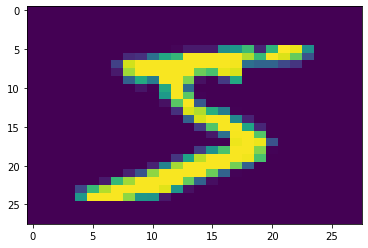

In [29]:
## test
from torchvision.datasets import MNIST

mnist_train = MNIST(root='mnist',train=True, download=True, transform=transform)
# print(mnist_train[0][0])

print(type(mnist_train[0][0]))

plt.imshow(mnist_train[0][0].permute(1, 2, 0),aspect="auto")
plt.show()

# First test implementation

## Costruction of dataset

- `all_labels.txt`: All image's labels of all entire dataset
- `classes.txt`: classes
- `test.txt`: test dataset
- `test.txt`: train dataset 

In [31]:
class TrashbeanDataset(Dataset):
    def __init__(self, base_path, txt_list, transform=None):
        IMG_CHANNEL = 3

        self.txt_list = txt_list ## utile per la normalizzazione

        self.base_path = base_path
        self.images = np.loadtxt(txt_list, dtype=str, delimiter=',')
        ## self.mean = np.zeros(IMG_CHANNEL)
        ## self.dev_std = np.zeros(IMG_CHANNEL)

        self.transform = transform

    def __getitem__(self, index):
        f,c = self.images[index] # recuperiamo il path dell'immagine di indice index e la relativa etichetta
        im = Image.open(path.join(self.base_path, f))   ## load img with PIL

        if self.transform is not None:          ## toTensor, resize, normalize etc...
            im = self.transform(im)

        label = int(c) # converto l'etichetta in intero

        return {'image': im, 'label': label}    # return dictionary --> immagine : etichetta

    # restituisce numero di campioni: la lunghezza della lista images
    def __len__(self):
        return len(self.images)

Carichiamo il dataset completo e applichiamo una permutazione dividendo tra train e test

In [32]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

transform = transforms.ToTensor()

dataset_train = TrashbeanDataset('static/datasets/img', 'static/datasets/train.txt', transform=transform) # can put (w,h) too#
#dataset_test = TrashbeanDataset('static/datasets/img', 'static/datasets/test.txt', transform=transform) # can put (w,h) too

#print("dim totale dataset train", dataset_train.__len__())
#print("img 1", dataset_train[0]['image'].shape, dataset_train[0]['label'])

Visualizziamo un esempio:

torch.Size([3, 1920, 1080]) <class 'torch.Tensor'>


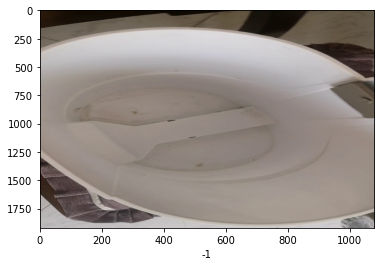

In [33]:
## visualizziamo un esempio:
print(dataset_train[0]['image'].shape, type(dataset_train[0]['image']))
plt.imshow(dataset_train[0]['image'].permute(1, 2, 0),aspect="auto")
plt.xlabel(dataset_train[0]['label'])
plt.show()

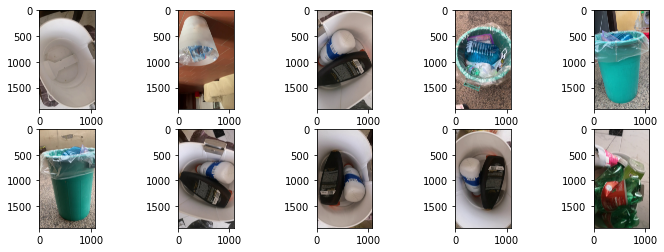

In [42]:
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

train_loader = DataLoader(dataset_train, batch_size=150, num_workers=2, shuffle=True) 


da implementare minialexnetv3 train classificator

- risolvere problema visualizzazione di torch su matplotlib (celle sopra)
- implementare il softmax con mlp